In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as sps

In [320]:
N, M = 4, 4
C = 5000
ERR_CHI = 0.95
ERR_NORM = 0.975
Ai, Bj = [x for x in range(N)], [x for x in range(M)]

In [321]:
def index(array, arity):
    array = [sum([array[t] for t in range(x + 1)]) for x in range(arity)]
    rand_value = np.random.random()
    index = len(array) - 1
    for x in array:
        if x >= rand_value:
            index = array.index(x)
            break
    return index

In [322]:
def generate(Pij):
    row_sums = [sum(x) for x in Pij]
    i = index(row_sums, N)
    n_rows = [x / sum(Pij[i]) for x in Pij[i]]
    j = index(n_rows, M)

    return (i, j)

In [323]:
def expected(Pij, Ai = Ai, Bj = Bj):
    e_row = 0
    for i in range(N):
        for j in range(M):
            e_row += Ai[i] * Pij[i][j]

    e_col = 0
    for j in range(M):
        for i in range(N):
            e_col += Bj[j] * Pij[i][j]

    return (e_row, e_col)

In [324]:
def show(Pij, normalized_m):
    a_prob_th, b_prob_th = np.sum(Pij, axis=1), np.sum(Pij, axis=0)
    a_prob_real, b_prob_real = np.sum(normalized_m, axis=1), np.sum(normalized_m, axis=0)
    data = {'P(A)_th': a_prob_th.tolist(), 'P(A)_real': a_prob_real.tolist()}
    df = pd.DataFrame(data)
    df.plot(kind='bar')
    plt.show()

    data = {'P(B)_th': b_prob_th.tolist(), 'P(B)_real': b_prob_real.tolist()}
    df = pd.DataFrame(data)
    df.plot(kind='bar')
    plt.show()

    sb.heatmap(normalized_m, cmap='summer')
    plt.show()

In [325]:
def correlation(normalized_m, a_exp, b_exp, a_disp, b_disp):
    ab_exp = 0
    for i in range(N):
        for j in range(M):
            ab_exp += normalized_m[i][j] * Ai[i] * Bj[j]
    cov = ab_exp - a_exp * b_exp

    cor = cov / np.sqrt(a_disp * b_disp)
    print(f'Correlation: {cor}\n')

In [326]:
def chi2(Pij, normalized_m):
    chi = C * np.sum(np.square(normalized_m - Pij) / Pij)
    print(f'Pirson agreement = {chi}')
    ppf = sps.chi2.ppf(ERR_CHI, Pij.shape[0] * Pij.shape[1] - 1)
    if chi < ppf:
        print(chi, '<', ppf)
        print(f'Real(Emp) covengers to theor', end='\n\n')
    else:
        print(chi, '>', ppf)
        print(f'Real(Emp) diverges from theor', end='\n\n')

In [327]:
def exp_estimation(e_a, d_a, e_b, d_b):
    d = sps.norm.ppf(ERR_NORM) * np.sqrt(d_a) / np.sqrt(C)
    print(f'M_estimation(А): ({e_a - d}, {e_a + d})')
    d = sps.norm.ppf(ERR_NORM) * np.sqrt(d_b) / np.sqrt(C)
    print(f'M_estimation(B): ({e_b - d}, {e_b + d})')

In [328]:
def disp_estimation(a_disp, b_disp):
    l_a = C * a_disp / sps.chi2.isf(1 - ERR_NORM, C - 1)
    r_a = C * a_disp / sps.chi2.isf(ERR_NORM, C - 1)
    print(f'D_estimation(А): ({l_a}, {r_a})')
    l_b = C * b_disp / sps.chi2.isf(1 - ERR_NORM, C - 1)
    r_b = C * b_disp / sps.chi2.isf(ERR_NORM, C - 1)
    print(f'D_estimation(B): ({l_b}, {r_b})')

Distribution matrix:
[[0.01175914 0.01959189 0.08693356 0.04690179]
 [0.15210871 0.14421334 0.06234535 0.01674054]
 [0.0193085  0.05585521 0.05972208 0.11060219]
 [0.06921688 0.02239016 0.01162647 0.11068418]]

Normalized distribution matrix:
[[0.0112 0.0162 0.0904 0.0426]
 [0.1594 0.1376 0.0604 0.0188]
 [0.0218 0.0532 0.0616 0.1156]
 [0.0652 0.0236 0.011  0.1114]]

E[A]_th: 1.5081369978033428, E[A]_real: 1.5142
E[B]_th: 1.5380916158319002, E[B]_real: 1.5426000000000002

D[A]_th: 1.0081419357907357, D[A]_real: 0.9929983600000001
D[B]_th: 1.323192925011762, D[B]_real: 1.3401852399999998

Correlation: 0.14285240641798416

Pirson agreement = 15.914541184615105
15.914541184615105 < 24.995790139728616
Real(Emp) covengers to theor

M_estimation(А): (1.4863693128659927, 1.5420306871340073)
M_estimation(B): (1.510511789044691, 1.5746882109553093)
D_estimation(А): (0.9553822530292949, 1.0333132130239018)
D_estimation(B): (1.289417229317283, 1.3945955725361003)


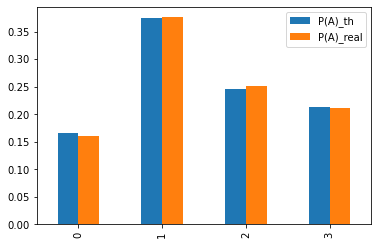

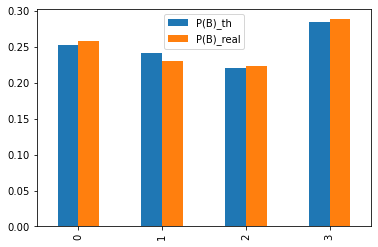

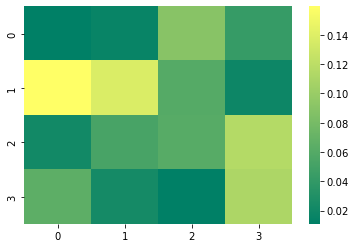

In [329]:
Pij = np.random.rand(N, M)
Pij = np.vectorize(lambda x: x / Pij.sum())(Pij)

print('Distribution matrix:')
print(Pij, end='\n\n')

distr_matrix = np.array([[0 for t in range(M)] for x in range(N)])
for _ in range(C):
    (i, j) = generate(Pij)
    distr_matrix[i][j] += 1
normalized_matrix = np.vectorize(lambda x: x / distr_matrix.sum())(distr_matrix)

print('Normalized distribution matrix:')
print(normalized_matrix, end='\n\n')

a_exp_th, b_exp_th = expected(Pij)
a_exp_real, b_exp_real = expected(normalized_matrix)
print(f'E[A]_th: {a_exp_th}, E[A]_real: {a_exp_real}')
print(f'E[B]_th: {b_exp_th}, E[B]_real: {b_exp_real}', end='\n\n')

a_exp2_th, b_exp2_th = expected(Pij, [x ** 2 for x in Ai], [x ** 2 for x in Bj])
a_disp_th, b_disp_th = a_exp2_th - a_exp_th ** 2, b_exp2_th - b_exp_th ** 2
a_exp2_real, b_exp2_real = expected(normalized_matrix, [x ** 2 for x in Ai], [x ** 2 for x in Bj])
a_disp_real, b_disp_real = a_exp2_real - a_exp_real ** 2, b_exp2_real - b_exp_real ** 2
print(f'D[A]_th: {a_disp_th}, D[A]_real: {a_disp_real}')
print(f'D[B]_th: {b_disp_th}, D[B]_real: {b_disp_real}', end='\n\n')

correlation(normalized_matrix, a_exp_real, b_exp_real, a_disp_real, b_disp_real)
chi2(Pij, normalized_matrix)
exp_estimation(a_exp_real, a_disp_th, b_exp_real, b_disp_real)
disp_estimation(a_disp_real, b_disp_real)

show(Pij, normalized_matrix)